In [33]:
import os
import numpy as np
import torch
from fft import HQS_FFT, HQS_FFT_edgetaped
import matplotlib.pyplot as plt
from skimage import data, measure

import utils

%matplotlib inline

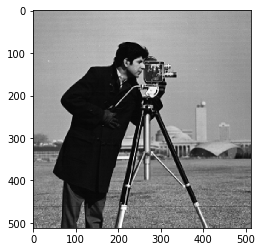

In [9]:
img = data.camera().astype(np.float32)/255
plt.imshow(img, cmap='gray')

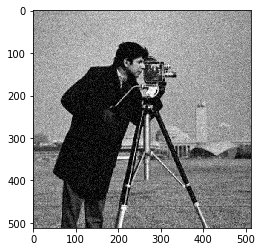

In [55]:
torch.manual_seed(0)

x = utils.to_tensor(img).unsqueeze(0)  # for batch dimension
sigma = 15./255
y = x + sigma * torch.randn_like(x)
y.clamp_(0,1)
im_noisy = y.squeeze().numpy()

plt.imshow(im_noisy, cmap='gray')

/home/ROCQ/willow/teboli/anaconda3/envs/pytorch_cuda-9.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/home/ROCQ/willow/teboli/anaconda3/envs/pytorch_cuda-9.0/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


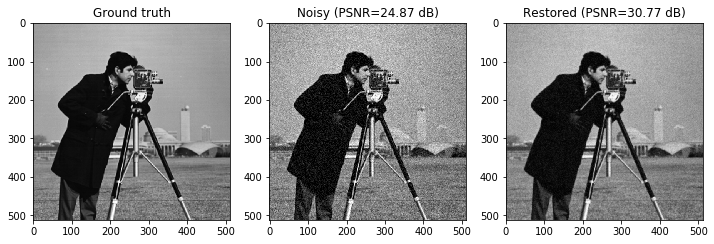

In [56]:
betas = np.array([0,1,4,4**2,4**3,4**4,4**4,4**5,4**6]) * 1e-2 / 81
lambd = 1e-1

k = torch.zeros(3,3)
k[1,1] = 1. # identity filter for denoising

n_iter = len(betas)

x_hat = HQS_FFT(y, k, lambd, n_iter, betas)
x_hat.clamp_(0,1)  # for display between 0 and 1.

im_restored = x_hat.squeeze().numpy()

psnr_before = measure.compare_psnr(img, im_noisy)
psnr_after = measure.compare_psnr(img, im_restored)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Ground truth")
plt.subplot(1,3,2)
plt.imshow(im_noisy, cmap='gray')
plt.title("Noisy (PSNR=%2.2f dB)" % psnr_before)
plt.subplot(1,3,3)
plt.imshow(im_restored, cmap='gray')
plt.title("Restored (PSNR=%2.2f dB)" % psnr_after)
plt.show()